In [4]:
import matplotlib.pyplot as plt
import re
import os
import sys
import numpy as np
from scipy.stats import norm
from settings_and_potential import *

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
# nrank = sys.argv[0]
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped")
font_size=25
lw=3
s=10
def U(x):
    res = s*(x*x-1)*(x*x-1)
    return res
myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

#######################################################
##### what do you want to run
#######################################################
## run the sample to check the look of the distributions 

q_noadax,p_noadax,g=openCfile_qp("data_one_dt_2d/vec_noada_x.txt")
q_noaday,p_noaday,g=openCfile_qp("data_one_dt_2d/vec_noada_y.txt")
q_trx,p_trx,g=openCfile_qp("data_one_dt_2d/vec_tr_x.txt")
q_try,p_try,g=openCfile_qp("data_one_dt_2d/vec_tr_y.txt")



// #define DIVTERM          //define to use
#define m               0.001           // minimum step scale factor
#define M               1.5             // maximum step scale factor
#define dt              0.00001           // artificial time stepsize
// #define T               500.            // final (real) time
#define gamma           0.1            // friction coefficient
#define tau             0.1            // 'temperature'
// #define printskip       10
#define numruns        1000000          // total number of trajectories
#define numsam         5000          // total number of trajectories


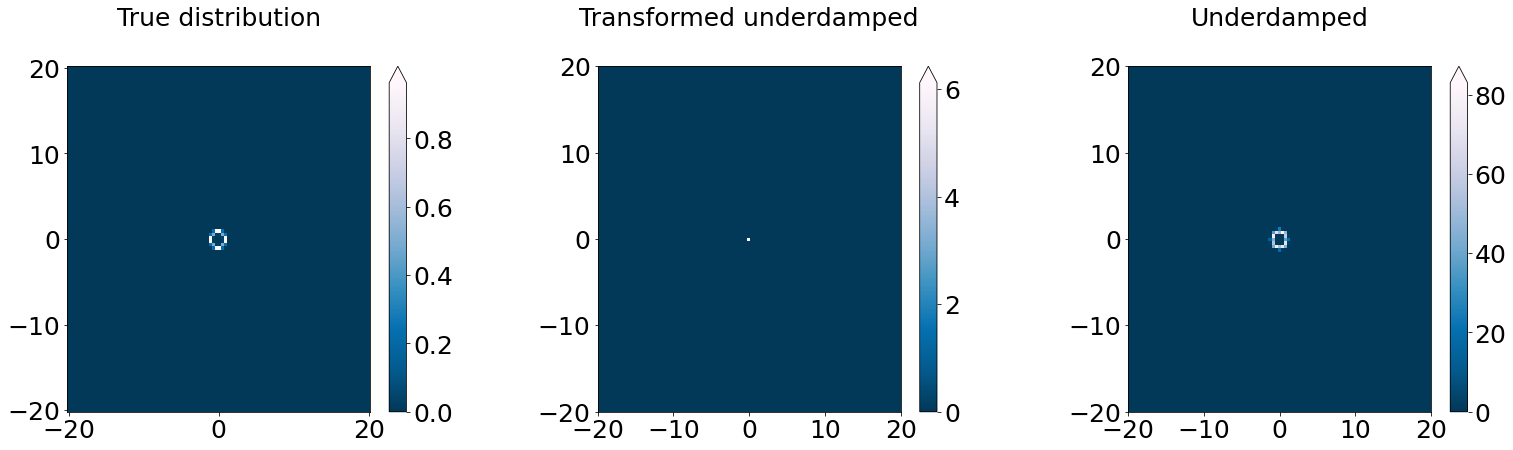

In [5]:
####################
##
#####################
tau=0.1
s=1
fig, (axs)= plt.subplots(1, 3,figsize=(25,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
####################
## True distribution
#####################
beta=1/0.1
nbins=100
bound=20
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-beta*s*(X**2 + Y**2-1)**2)
# fig = plt.figure(figsize=(20, 6))
axs[0].set_title('True distribution',fontsize=font_size,y=1.1)
axs[0].pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=np.exp(-1), vmax=1))
pcm = axs[0].pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[0], extend='max')
# plt.show()

####################
## Transformed distribution
#####################
nbins=100
xedges = np.linspace(-bound,bound,nbins)
yedges = np.linspace(-bound,bound,nbins)
H, xedges, yedges = np.histogram2d(q_trx, q_try, bins=(xedges, yedges),density=True)
H.T
# fig = plt.figure(figsize=(20, 6))
axs[1].set_title('Transformed underdamped',fontsize=font_size,y=1.1)
X, Y = np.meshgrid(xedges, yedges)
axs[1].pcolormesh(X, Y, H, norm=colors.LogNorm(vmin=np.exp(-1), vmax=1))
pcm = axs[1].pcolor(X, Y, H, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[1], extend='max')
# plt.show()

####################
## Not adaptive distribution
#####################
nbins=100
xedges = np.linspace(-bound,bound,nbins)
yedges = np.linspace(-bound,bound,nbins)

H, xedges, yedges = np.histogram2d(q_noadax, q_noaday, bins=(xedges, yedges))
H.T
axs[2].set_title('Underdamped',fontsize=font_size,y=1.1)
X, Y = np.meshgrid(xedges, yedges)
axs[2].pcolormesh(X, Y, H, norm=colors.LogNorm(vmin=np.exp(-2), vmax=np.max(H)))
pcm = axs[2].pcolor(X, Y, H, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[2], extend='max')
plt.show()

In [18]:
####################
## Histogram of the values taken by g
#####################

####################
##
#####################
tau=0.1
s=10
fig, (axs)= plt.subplots(1, 3,figsize=(25,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
####################
## True distribution
#####################
beta=1/0.1
nbins=100
bound=20
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z=4*(X*X + Y*Y-1)*np.abs(X**2)*np.abs(Y**2)
# fig = plt.figure(figsize=(20, 6))
axs[0].set_title('True distribution',fontsize=font_size,y=1.1)
axs[0].pcolormesh(X, Y, Z,norm=colors.LogNorm(vmin=np., vmax=np.max(Z)))
pcm = axs[0].pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[0], extend='max')


###



SyntaxError: invalid syntax (<ipython-input-18-b3777d7c319e>, line 29)

// #define DIVTERM          //define to use
#define m               0.001           // minimum step scale factor
#define M               1.5             // maximum step scale factor
#define dt              0.00001           // artificial time stepsize
// #define T               500.            // final (real) time
#define gamma           0.1            // friction coefficient
#define tau             0.1            // 'temperature'
// #define printskip       10
#define numruns        1000000          // total number of trajectories
#define numsam         5000          // total number of trajectories


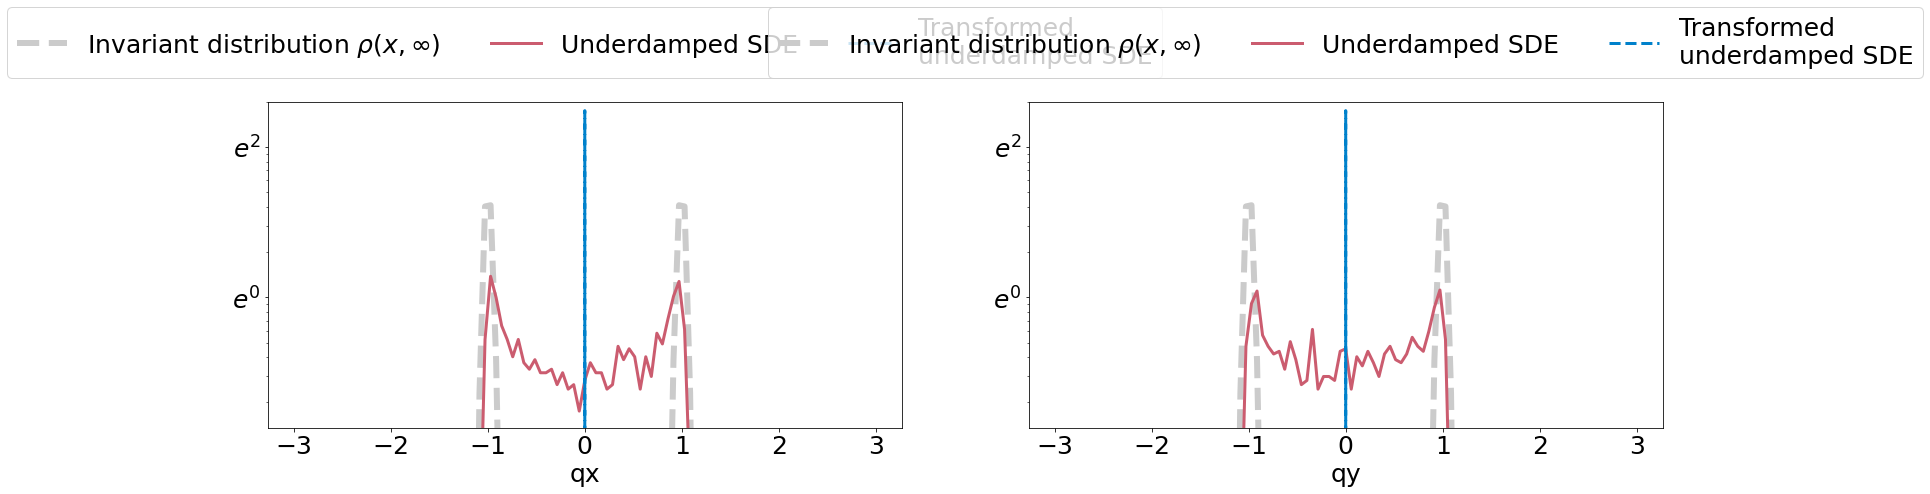

In [7]:

fig, ((axs))= plt.subplots(1,2,figsize=(25,6))# plt.figure(figsize=(4,4))
# fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=105
range_bins=[-3,3]

############
## Q vals ##
############
# SDE
histogram_noadax,bins = np.histogram(q_noadax,bins=nbins,range=range_bins, density=True)
histogram_noaday,bins = np.histogram(q_noaday,bins=nbins,range=range_bins, density=True)

#transformed
histogram_trx,bins = np.histogram(q_trx,bins=nbins,range=range_bins, density=True)
histogram_try,bins = np.histogram(q_try,bins=nbins,range=range_bins, density=True)
midx = (bins[0:-1]+bins[1:])/2

# Invariant distribution for q
rho = np.exp(- U(midx)/tau)
rho = rho / (np.sum(rho)* (midx[1]-midx[0]) ) # Normalize rho by dividing by its approx. integral

# Log Q X
#######
axs[0].semilogy(midx,(rho),"--",linewidth=lw*2,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
axs[0].semilogy(midx,(histogram_noadax),"-",linewidth=lw,label='Underdamped SDE',color=myred)
axs[0].semilogy(midx,(histogram_trx),"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[0].set_ylim(np.exp(-2),np.exp(3))
axs[0].set_xlabel("qx", fontsize=font_size)
def ticks(y, pos):
    return r'$e^{:.0f}$'.format(np.log(y))

axs[0].yaxis.set_major_formatter(mtick.FuncFormatter(ticks))
axs[0].legend(loc='upper center',bbox_to_anchor=(0.5, 1.33),
          ncol=3,fontsize=font_size) #, bbox_to_anchor=(0.5, 1.33),

# Log Q Y
#######
# SDE

axs[1].semilogy(midx,(rho),"--",linewidth=lw*2,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
axs[1].semilogy(midx,(histogram_noaday),"-",linewidth=lw,label='Underdamped SDE',color=myred)
axs[1].semilogy(midx,(histogram_try),"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[1].set_ylim(np.exp(-2),np.exp(3))
axs[1].set_xlabel("qy", fontsize=font_size)
def ticks(y, pos):
    return r'$e^{:.0f}$'.format(np.log(y))

axs[1].yaxis.set_major_formatter(mtick.FuncFormatter(ticks))
axs[1].legend(loc='upper center',bbox_to_anchor=(0.5, 1.33),
          ncol=3,fontsize=font_size) #, bbox_to_anchor=(0.5, 1.33),


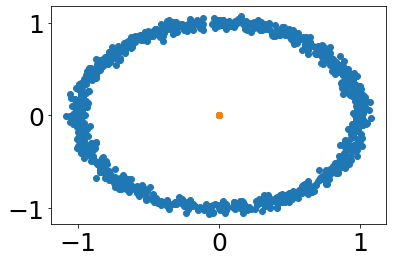

In [8]:
plt.scatter((q_noadax),q_noaday)
# plt.scatter(np.log(p_noadax),np.log(p_noaday))
plt.scatter((q_trx),(q_try))
# plt.scatter(np.log(p_trx),np.log(p_try))